In [1]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
font = {'family' : 'Noto Sans CJK JP'}
matplotlib.rc('font', **font)

In [2]:
sources = ["pcr_positive_daily.csv",
"pcr_tested_daily.csv",
"cases_total.csv",
"recovery_total.csv",
"death_total.csv",
"severe_daily.csv",
"pcr_case_daily.csv",
"current_situation.csv"]

In [3]:
!mkdir -p data/mhlw
for source in sources:
    !wget https://www.mhlw.go.jp/content/{source} -O data/mhlw/{source}

--2021-04-21 16:45:37--  https://www.mhlw.go.jp/content/pcr_positive_daily.csv
www.mhlw.go.jp (www.mhlw.go.jp) をDNSに問いあわせています... 2600:140b:a800:99d::3194, 2600:140b:a800:994::3194, 23.42.212.111
www.mhlw.go.jp (www.mhlw.go.jp)|2600:140b:a800:99d::3194|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 7835 (7.7K) [text/csv]
`data/mhlw/pcr_positive_daily.csv' に保存中

data/mhlw/pcr_posit 100%[===================>]   7.65K  --.-KB/s    in 0s      

2021-04-21 16:45:37 (58.1 MB/s) - `data/mhlw/pcr_positive_daily.csv' へ保存完了 [7835/7835]

--2021-04-21 16:45:37--  https://www.mhlw.go.jp/content/pcr_tested_daily.csv
www.mhlw.go.jp (www.mhlw.go.jp) をDNSに問いあわせています... 2600:140b:a800:99d::3194, 2600:140b:a800:994::3194, 23.42.212.111
www.mhlw.go.jp (www.mhlw.go.jp)|2600:140b:a800:99d::3194|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 7174 (7.0K) [text/csv]
`data/mhlw/pcr_tested_daily.csv' に保存中

data/mhlw/pcr_teste 100%[===================>]   7.01K  --.-KB/s 

In [4]:
data = []
for s in sources[0:-2]:
    data.append(pd.read_csv("data/mhlw/%s"%s))

df = data[0]
for d in data[1:]:
    df=pd.merge(df, d, on="日付")
df

,日付,PCR 検査陽性者数(単日),Unnamed: 2,Unnamed: 3,PCR 検査実施件数(単日),入院治療を要する者,退院、療養解除となった者,死亡者数,重症者数
0,2020/2/14,7,NaN,NaN,43,9,12,1,2
1,2020/2/15,12,NaN,NaN,86,24,12,1,3
2,2020/2/16,6,NaN,NaN,65,24,13,1,3
3,2020/2/17,7,NaN,NaN,113,24,12,1,3
4,2020/2/18,7,NaN,NaN,9,31,14,1,6
...,...,...,...,...,...,...,...,...,...
423,2021/4/15,4570,NaN,NaN,82330,34543,473345,9535,670
424,2021/4/16,4519,NaN,NaN,77966,36493,475966,9581,702
425,2021/4/17,4722,NaN,NaN,50503,38600,478373,9619,723
426,2021/4/18,4032,NaN,NaN,30571,40425,480632,9638,738


In [5]:
df["入院治療を要する者"] = df["入院治療を要する者"].diff()
df["退院、療養解除となった者"] = df["退院、療養解除となった者"].diff()
df["重症者数"] = df["重症者数"].diff()
df["死亡者数"] = df["死亡者数"].diff()
df["日付"]=pd.to_datetime(df["日付"])

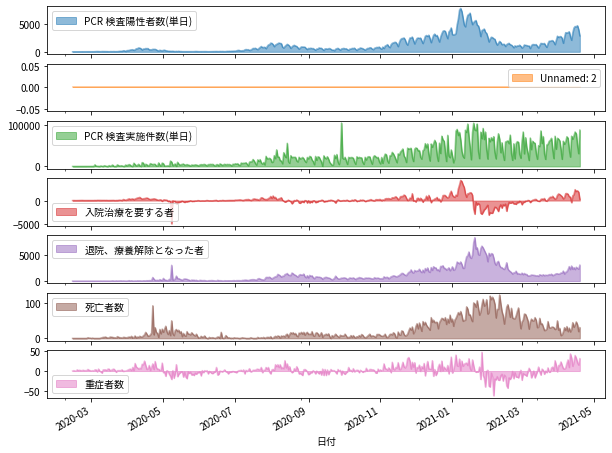

In [6]:
df.plot(kind="area", stacked=False, x="日付", subplots=True,figsize=[10,8])
None

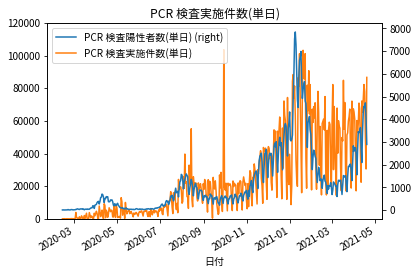

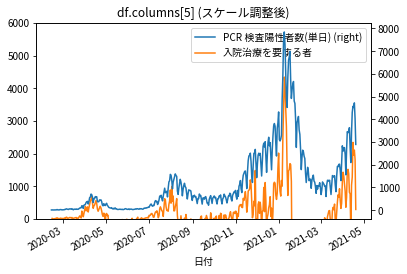

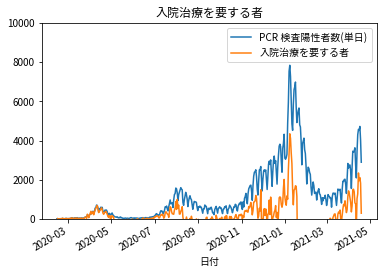

In [7]:
df[["日付", "PCR 検査陽性者数(単日)", df.columns[4]]].plot(x="日付",ylim=(0, 120000), title=df.columns[4], secondary_y=["PCR 検査陽性者数(単日)"])
plt.savefig("death-recov/recov.png")
ax = df[["日付", "PCR 検査陽性者数(単日)", df.columns[5]]].plot(x="日付",ylim=(0,6000), title="df.columns[5] (スケール調整後)", secondary_y=["PCR 検査陽性者数(単日)"])
plt.savefig("death-recov/death-scaled.png")
ax = df[["日付", "PCR 検査陽性者数(単日)", df.columns[5]]].plot(x="日付",ylim=(0,10000),title=df.columns[5])
plt.savefig("death-recov/death.png")

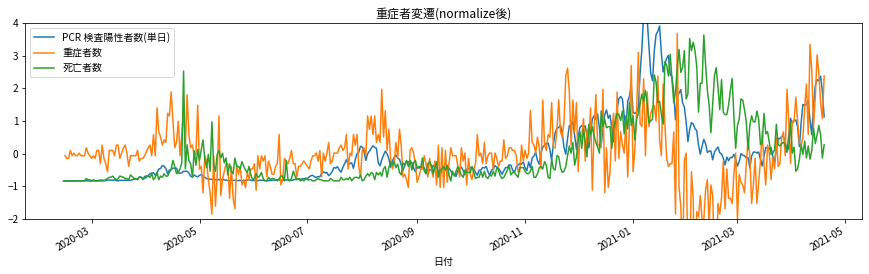

In [8]:
df2=df[["日付", "PCR 検査陽性者数(単日)","重症者数", "死亡者数"]].set_index("日付")
normalized_df=(df2-df2.mean())/df2.std()
normalized_df.plot(ylim=(-2,4), title="重症者変遷(normalize後)",figsize=[15,4])
plt.savefig("death-recov/norm.png")

In [9]:
positive1=df[["日付","PCR 検査陽性者数(単日)"]].loc[df["日付"] < datetime(2020,6,1)].sum()[0]
death1=df[["日付","死亡者数"]].loc[df["日付"] < datetime(2020,7,1)].sum()[0]

positive2=df[["日付","PCR 検査陽性者数(単日)"]].loc[(df["日付"] >= datetime(2020,6,1))&(df["日付"] < datetime(2020,11,1))].sum()[0]
death2=df[["日付","死亡者数"]].loc[(df["日付"] >= datetime(2020,7,1))&(df["日付"] < datetime(2020,12,1))].sum()[0]

print("第1波: %d/%d"%(death1, positive1))
print("第2波: %d/%d"%(death2, positive2))

rate1=float(death1)/positive1
rate2=float(death2)/positive2
print("死亡率")
print("第1波: %.3f%%"%(rate1*100))
print("第2波: %.3f%%"%(rate2 * 100))
print("第1波/第2波=%f"%(rate1/rate2))

第1波: 972/16624
第2波: 1165/83789
死亡率
第1波: 5.847%
第2波: 1.390%
第1波/第2波=4.205250


In [10]:
df3 = df.copy()
df3.loc[df3["日付"]<datetime(2020,6,1), "PCR 検査陽性者数(単日)"] *= rate1/rate2

/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


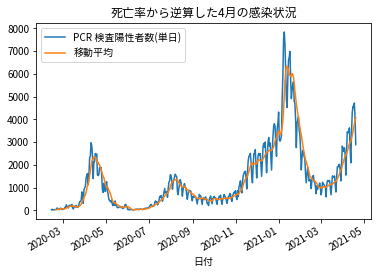

In [11]:
df4=df3[["日付", "PCR 検査陽性者数(単日)"]]
df4["移動平均"]=df4["PCR 検査陽性者数(単日)"].rolling(7).mean()
df4.plot(x="日付",title="死亡率から逆算した4月の感染状況")
plt.savefig("death-recov/positive-guess.png")

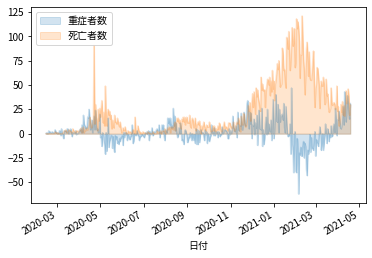

In [12]:
ax=df[["日付", "重症者数", "死亡者数"]].plot(kind="area", stacked=False, alpha=0.2, x="日付")
plt.savefig("death-recov/serious.png")

In [13]:
df["陽性者数(7日平均)"] = df["PCR 検査陽性者数(単日)"].rolling(7).mean()
df["PCR件数(7日平均)"] = df["PCR 検査実施件数(単日)"].rolling(7).mean()
df["陽性率(7日平均)"]=df["陽性者数(7日平均)"]/df["PCR件数(7日平均)"]
df

,日付,PCR 検査陽性者数(単日),Unnamed: 2,Unnamed: 3,PCR 検査実施件数(単日),入院治療を要する者,退院、療養解除となった者,死亡者数,重症者数,陽性者数(7日平均),PCR件数(7日平均),陽性率(7日平均)
0,2020-02-14,7,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-15,12,NaN,NaN,86,15.0,0.0,0.0,1.0,NaN,NaN,NaN
2,2020-02-16,6,NaN,NaN,65,0.0,1.0,0.0,0.0,NaN,NaN,NaN
3,2020-02-17,7,NaN,NaN,113,0.0,-1.0,0.0,0.0,NaN,NaN,NaN
4,2020-02-18,7,NaN,NaN,9,7.0,2.0,0.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-15,4570,NaN,NaN,82330,2345.0,2175.0,38.0,39.0,3466.428571,60565.571429,0.057234
424,2021-04-16,4519,NaN,NaN,77966,1950.0,2621.0,46.0,32.0,3616.714286,62045.142857,0.058292
425,2021-04-17,4722,NaN,NaN,50503,2107.0,2407.0,38.0,21.0,3772.714286,63413.571429,0.059494
426,2021-04-18,4032,NaN,NaN,30571,1825.0,2259.0,19.0,15.0,3954.714286,64571.428571,0.061246


<AxesSubplot:xlabel='日付'>

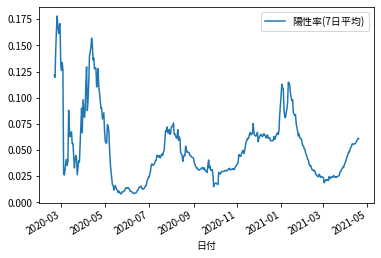

In [14]:
df[["日付","陽性率(7日平均)"]].plot(x="日付")

In [15]:
display(df[["日付","陽性率(7日平均)"]].loc[df["日付"] < datetime(2020,6,1)].mean()*100)
display(df[["日付","陽性率(7日平均)"]].loc[(df["日付"] >= datetime(2020,6,1)) & (df["日付"] < datetime(2020,11,1))].mean()*100)
display(df[["日付","陽性率(7日平均)"]].loc[df["日付"] >= datetime(2020,11,1)].mean()*100)

/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


陽性率(7日平均)    7.408039
dtype: float64

/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


陽性率(7日平均)    3.537966
dtype: float64

/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


陽性率(7日平均)    5.365073
dtype: float64